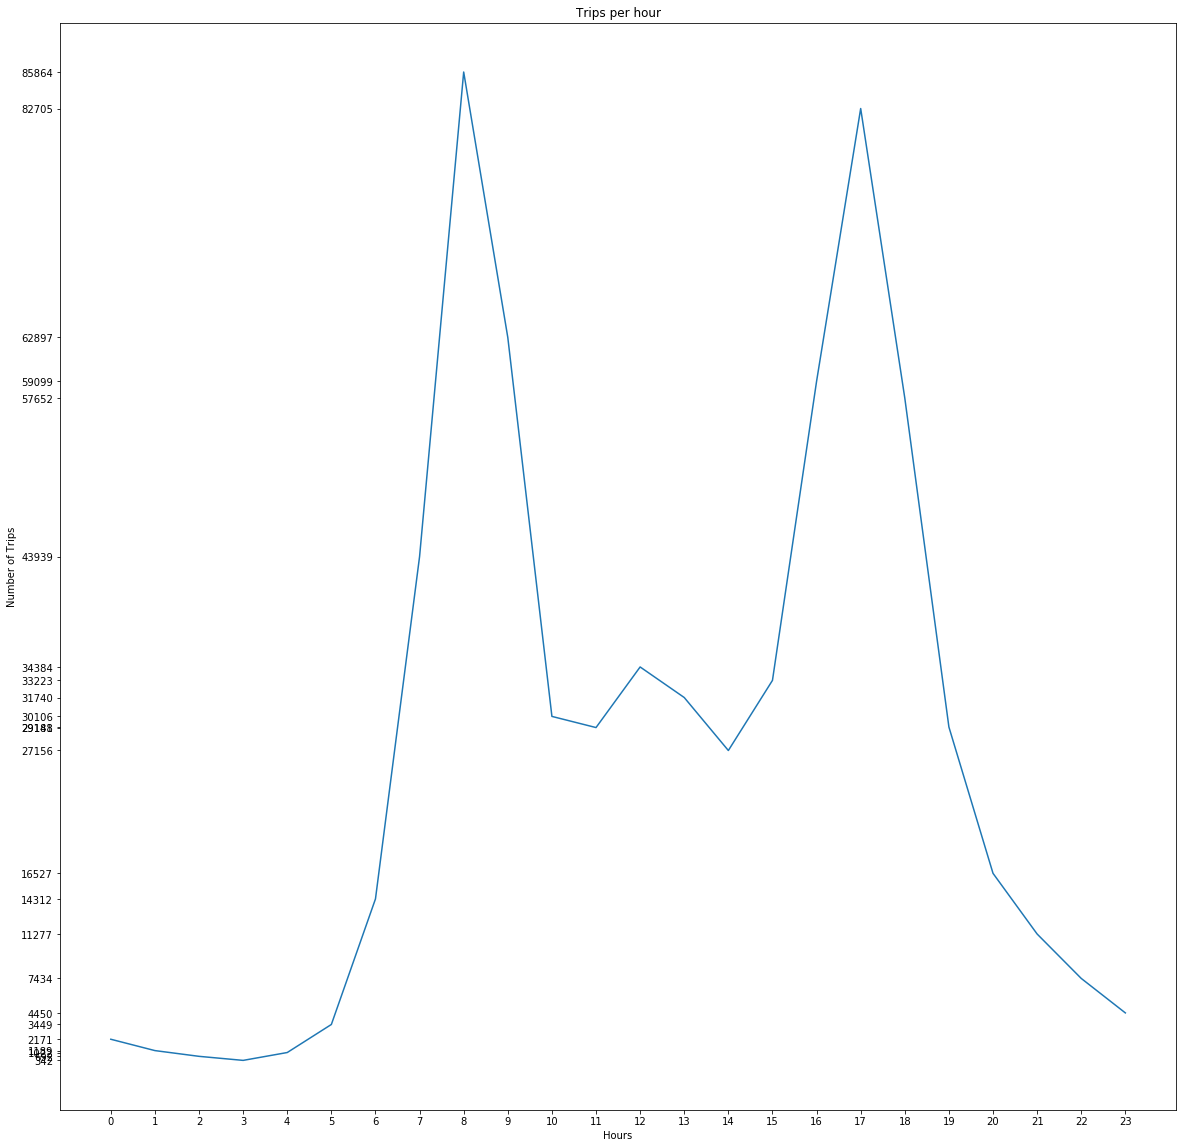

In [3]:
import pandas
import numpy
import matplotlib.pyplot as pt

df2014 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201402_trip_data.csv',usecols = ['Trip ID','Start Date'])
df2014_02 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201408_trip_data.csv',usecols = ['Trip ID','Start Date'])
df2015 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_trip_data.csv',usecols = ['Trip ID','Start Date'])
dataframes = [df2014,df2014_02,df2015]
df = pandas.concat(dataframes)
df['Start Date'] = pandas.to_datetime(df['Start Date'], format = '%m/%d/%Y %H:%M').dt.hour
hours = df['Start Date'].drop_duplicates()
tripsperhour = df.groupby('Start Date',as_index = False).count()
figsize = pt.rcParams["figure.figsize"]
figsize[0] = 20
figsize[1] = 20
pt.rcParams["figure.figsize"] = figsize
fig,ax = pt.subplots()
ax.set_title("Trips per hour")
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Trips')
ax.set_xticks(tripsperhour['Start Date'])
ax.set_xticklabels(tripsperhour['Start Date'])
ax.set_yticks(tripsperhour['Trip ID'])
ax.set_yticklabels(tripsperhour['Trip ID'])
ax.plot(tripsperhour['Start Date'],tripsperhour['Trip ID'])
pt.show()

   Duration  Trip ID
0         1   669663
1         3      238
2       365       58


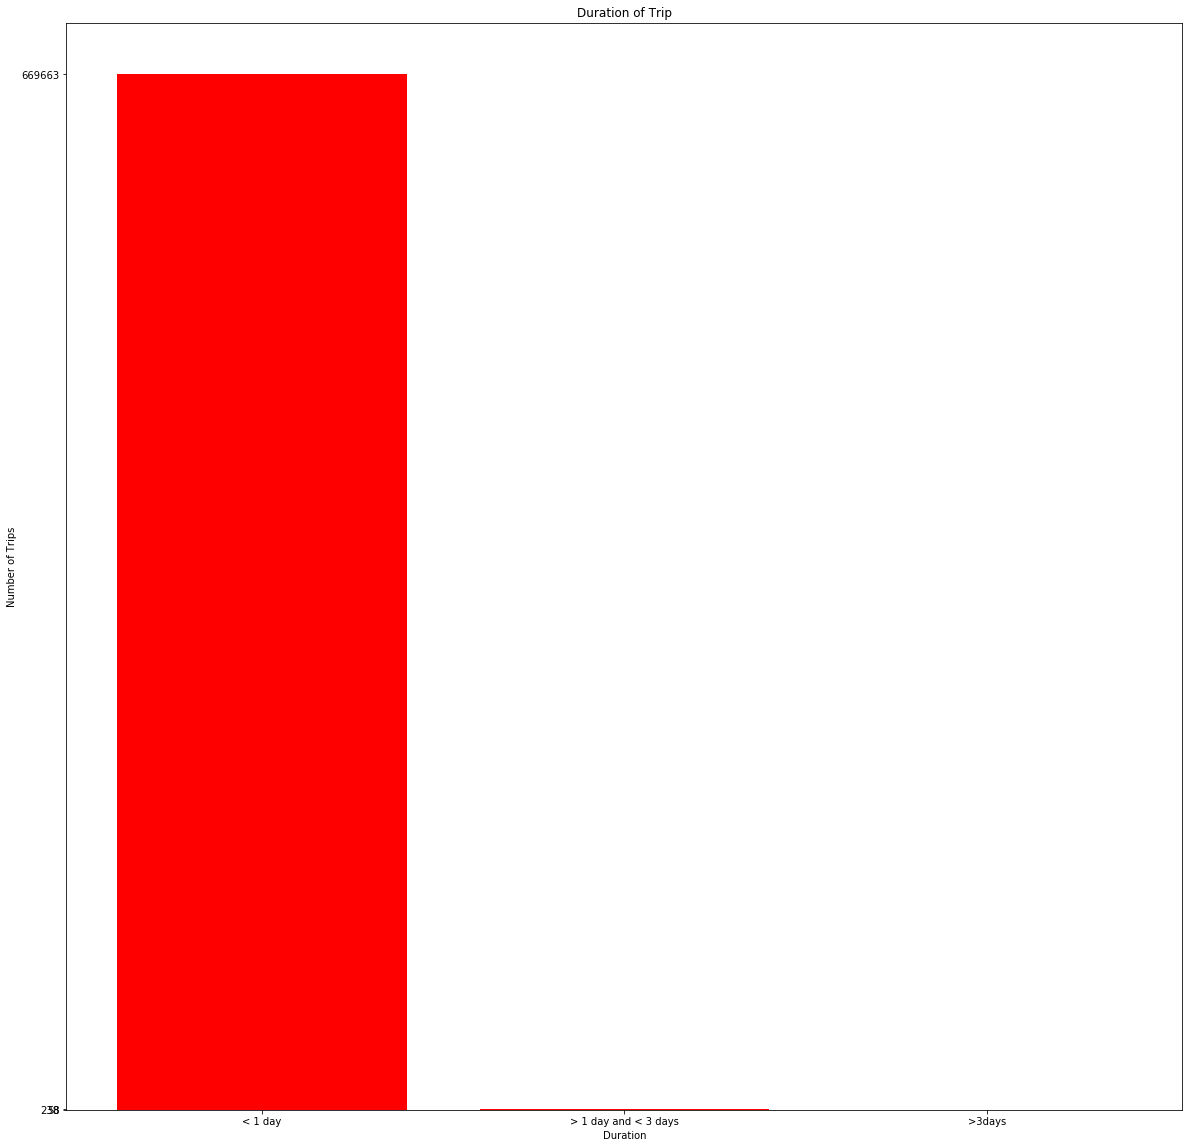

In [31]:
import pandas
import numpy
import matplotlib.pyplot as pt

df2014    = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201402_trip_data.csv',usecols = ['Trip ID','Duration'])
df2014_02 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201408_trip_data.csv',usecols = ['Trip ID','Duration'])
df2015    = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_trip_data.csv',usecols = ['Trip ID','Duration'])
df2014    = df2014.rename(columns = {'Subscription Type':'Subscriber Type'})
dataframes = [df2014,df2014_02,df2015]
df = pandas.concat(dataframes)
duration = ['< 1 day','> 1 day and < 3 days','>3days']
df.loc[df['Duration'] <= 86400, 'Duration'] = 1
df.loc[(df['Duration'] > 86400) & (df['Duration'] <= 259200),'Duration'] = 3
df.loc[df['Duration'] > 259200, 'Duration'] = 365
df = df.groupby('Duration',as_index=False).count()
print(df)
fig,ax = pt.subplots()
ax.set_title('Duration of Trip')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of Trips')
ax.set_xticks(numpy.arange(1,len(duration)+1,1))
ax.set_xticklabels(duration)
ax.set_yticks(df['Trip ID'])
ax.set_yticklabels(df['Trip ID']) 
ax.bar(numpy.arange(1,len(duration)+1,1),df['Trip ID'],0.8,color = "red")
pt.show()